# Process Mining: Event Log and Footprint
Code is partially copied from this tutorial: https://medium.com/@c3_62722/process-mining-with-python-tutorial-a-healthcare-application-part-1-ae02027a050

In [1]:
# uncomment to install pm4py in correct version, make sure to comply with implementation guidelines first: https://pm4py.fit.fraunhofer.de/install
#! pip install update pm4py==2.7.8

In [2]:
import pm4py
# how pm4py version
print(pm4py.__version__)
assert pm4py.__version__=="2.7.8"

2.7.8


In [3]:
import pandas as pd

# process mining libraries
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.footprints import algorithm as footprints_discovery
from pm4py.visualization.footprints import visualizer as fp_visualizer


In [4]:
fn = 'ArtificialPatientTreatment.csv'
events = pd.read_csv(fn)

events.columns = ['patient', 'action', 'resource', 'datetime']
events['datetime'] = pd.to_datetime(events['datetime'])
events.head()


,patient,action,resource,datetime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


In [5]:
print('{} has {} rows and {} columns.'.format(fn, events.shape[0], events.shape[1]))


ArtificialPatientTreatment.csv has 690 rows and 4 columns.


# Process Mining

In [6]:
# read in pandas dataframe into pm4py log

eventlog = events.copy()
### Specify which columns correspond to case (case:concept:name), 
###event (concept:name) and timestamp (time:timestamp) - rename columns in accordance
eventlog.rename(columns={'datetime': 'time:timestamp', 'patient': 'case:concept:name', 'action': 'concept:name', 'resource': 'org:resource'}, inplace=True)

## Convert to log format
log = log_converter.apply(eventlog)

### Log Exploration

In [44]:
# print data type of log
print(type(log))

<class 'pm4py.objects.log.obj.EventLog'>


In [40]:
# number of cases in log
print("Number of cases in log: ", len(log))

Number of cases in log:  100


In [41]:
# look at first case in log
print(log[0])

{'attributes': {'concept:name': 'patient 0'}, 'events': [{'concept:name': ' First consult', 'org:resource': ' Dr. Anna', 'time:timestamp': Timestamp('2017-01-02 11:40:11')}, '..', {'concept:name': ' Final consult', 'org:resource': ' Dr. Ben', 'time:timestamp': Timestamp('2017-01-09 08:29:28')}]}


In [55]:
# print number of events
for event in log[0]:
    print(event)
print("Number of events in first case: ", len(log[0]))


{'concept:name': ' First consult', 'org:resource': ' Dr. Anna', 'time:timestamp': Timestamp('2017-01-02 11:40:11'), 'case:concept:name': 'patient 0', 'case:@@index': 0}
{'concept:name': ' Blood test', 'org:resource': ' Lab', 'time:timestamp': Timestamp('2017-01-02 12:47:33'), 'case:concept:name': 'patient 0', 'case:@@index': 0}
{'concept:name': ' Physical test', 'org:resource': ' Nurse Jesse', 'time:timestamp': Timestamp('2017-01-02 12:53:50'), 'case:concept:name': 'patient 0', 'case:@@index': 0}
{'concept:name': ' Second consult', 'org:resource': ' Dr. Anna', 'time:timestamp': Timestamp('2017-01-02 16:21:06'), 'case:concept:name': 'patient 0', 'case:@@index': 0}
{'concept:name': ' Surgery', 'org:resource': ' Dr. Charlie', 'time:timestamp': Timestamp('2017-01-05 13:23:09'), 'case:concept:name': 'patient 0', 'case:@@index': 0}
{'concept:name': ' Final consult', 'org:resource': ' Dr. Ben', 'time:timestamp': Timestamp('2017-01-09 08:29:28'), 'case:concept:name': 'patient 0', 'case:@@index

In [22]:
# number of events in log
print("Number of events in log: ", sum([len(case) for case in log]))    

Number of events in log:  100


In [18]:
# start activities
log_start = pm4py.get_start_activities(log)
print(f"start activities: {log_start}")

start activities: {' First consult': 100}


In [19]:
# end activities
end_activities = pm4py.get_end_activities(log)
print(f"end activities: {end_activities}")

end activities: {' Final consult': 100}


In [17]:
# simplified traces
variants = pm4py.get_variants_as_tuples(log)
print(f"number of traces: {len(variants)}")
# iterate over simplified traces and print them
for variant in variants:
    print(variant)


number of traces: 15
(' First consult', ' Blood test', ' Physical test', ' Second consult', ' Surgery', ' Final consult')
(' First consult', ' Physical test', ' Blood test', ' X-ray scan', ' Second consult', ' Medicine', ' Final consult')
(' First consult', ' Physical test', ' X-ray scan', ' Blood test', ' Second consult', ' Medicine', ' Final consult')
(' First consult', ' Blood test', ' X-ray scan', ' Physical test', ' Second consult', ' Medicine', ' Final consult')
(' First consult', ' Blood test', ' Physical test', ' X-ray scan', ' Second consult', ' Medicine', ' Final consult')
(' First consult', ' Physical test', ' X-ray scan', ' Blood test', ' Second consult', ' Surgery', ' Final consult')
(' First consult', ' Physical test', ' Blood test', ' X-ray scan', ' Second consult', ' Surgery', ' Final consult')
(' First consult', ' X-ray scan', ' Blood test', ' Physical test', ' Second consult', ' Medicine', ' Final consult')
(' First consult', ' Physical test', ' Blood test', ' Second 

In [20]:
# count activity occurences
activities = pm4py.get_event_attribute_values(log, "concept:name")
print(f"number of activities: {len(activities)}")
print(f"activity occurences: {activities}")

number of activities: 8
activity occurences: {' First consult': 100, ' Blood test': 100, ' Physical test': 100, ' Second consult': 100, ' Surgery': 20, ' Final consult': 100, ' X-ray scan': 90, ' Medicine': 80}


In [21]:
# resources
resources = pm4py.get_event_attribute_values(log, "org:resource")
print(f"number of resources: {len(resources)}")
print(f"resources: {resources}")

number of resources: 13
resources: {' Dr. Anna': 158, ' Lab': 100, ' Nurse Jesse': 57, ' Dr. Charlie': 5, ' Dr. Ben': 50, ' Team 1': 40, ' Pharmacy': 80, ' Team 2': 50, ' Nurse Corey': 43, ' Dr. Bob': 92, ' Dr. Rudy': 7, ' Dr. Alex': 5, ' Dr. Quinn': 3}


In [48]:
# print earliest timestamp
def find_earliest_timestamp(log):
    earliest_timestamp = None

    for trace in log:
        for event in trace:
            if earliest_timestamp is None or event['time:timestamp'] < earliest_timestamp:
                earliest_timestamp = event['time:timestamp']

    return earliest_timestamp
print(f"earliest timestamp: {find_earliest_timestamp(log)}")

# find latest timestamp
def find_latest_timestamp(log):
    latest_timestamp = None

    for trace in log:
        for event in trace:
            if latest_timestamp is None or event['time:timestamp'] > latest_timestamp:
                latest_timestamp = event['time:timestamp']

    return latest_timestamp
print(f"latest timestamp: {find_latest_timestamp(log)}")

earliest timestamp: 2017-01-02 11:40:11
latest timestamp: 2017-05-31 14:16:13


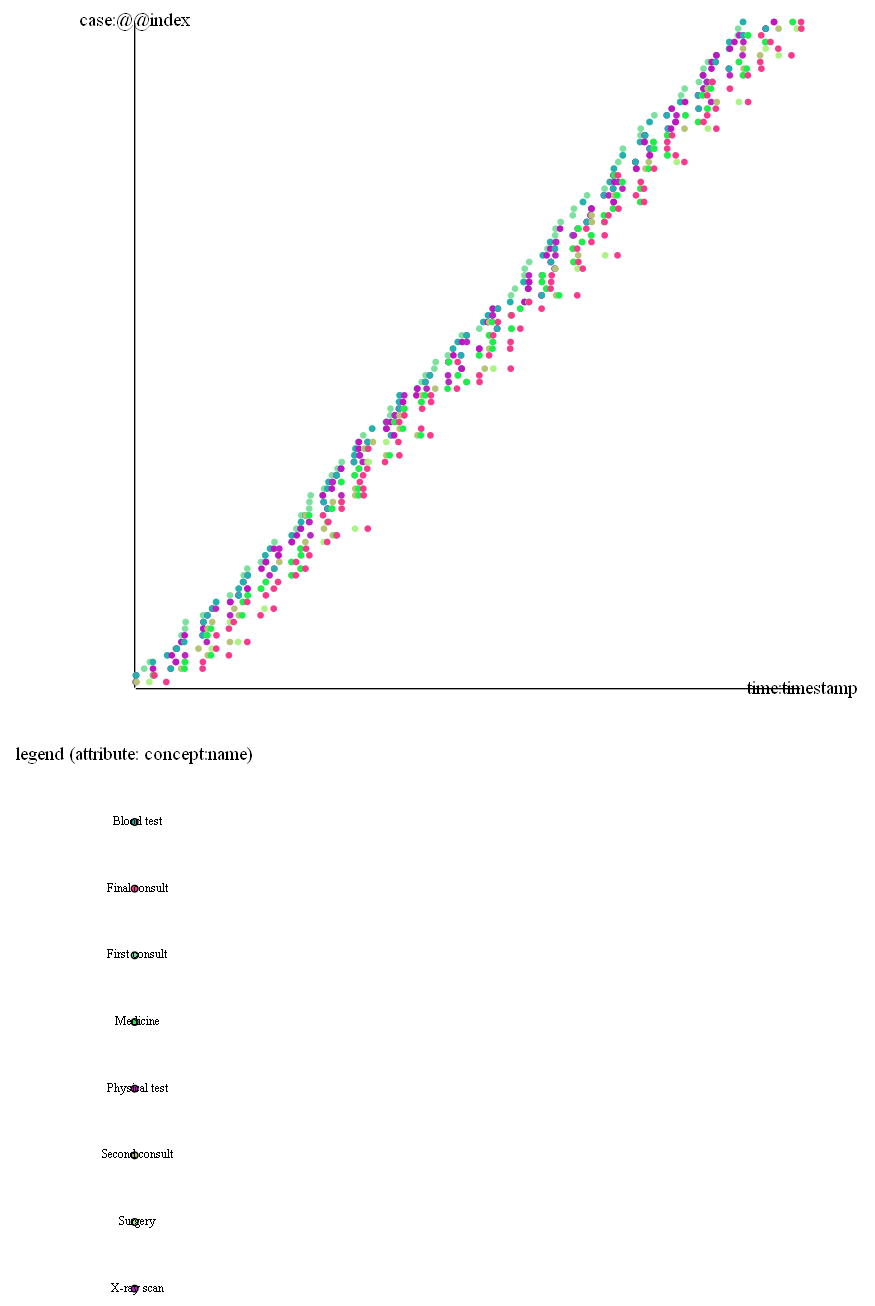

In [49]:
# dotted chart visualization
pm4py.view_dotted_chart(log)

### Footprint Analysis

In [12]:
# footprint analysis
fp_log = footprints_discovery.apply(log, variant=footprints_discovery.Variants.ENTIRE_EVENT_LOG)

### Occurences of binary relations

In [13]:
fp_log['dfg']

Counter({(' First consult', ' Blood test'): 40,
         (' Blood test', ' Physical test'): 35,
         (' Physical test', ' Second consult'): 36,
         (' Second consult', ' Surgery'): 20,
         (' Surgery', ' Final consult'): 20,
         (' First consult', ' Physical test'): 33,
         (' Physical test', ' Blood test'): 33,
         (' Blood test', ' X-ray scan'): 32,
         (' X-ray scan', ' Second consult'): 31,
         (' Second consult', ' Medicine'): 80,
         (' Medicine', ' Final consult'): 80,
         (' Physical test', ' X-ray scan'): 31,
         (' X-ray scan', ' Blood test'): 27,
         (' Blood test', ' Second consult'): 33,
         (' X-ray scan', ' Physical test'): 32,
         (' First consult', ' X-ray scan'): 27})

### Causalities

In [14]:
fp_log['sequence']

{(' Blood test', ' Second consult'),
 (' First consult', ' Blood test'),
 (' First consult', ' Physical test'),
 (' First consult', ' X-ray scan'),
 (' Medicine', ' Final consult'),
 (' Physical test', ' Second consult'),
 (' Second consult', ' Medicine'),
 (' Second consult', ' Surgery'),
 (' Surgery', ' Final consult'),
 (' X-ray scan', ' Second consult')}

### Parallel

In [15]:
fp_log['parallel']

{(' Blood test', ' Physical test'),
 (' Blood test', ' X-ray scan'),
 (' Physical test', ' Blood test'),
 (' Physical test', ' X-ray scan'),
 (' X-ray scan', ' Blood test'),
 (' X-ray scan', ' Physical test')}

## Footprint table

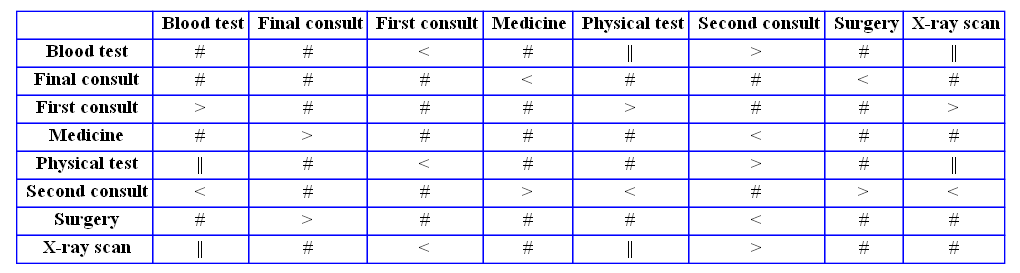

In [16]:
# caution: arrows mean "causality" here NOT "follows"
gviz = fp_visualizer.apply(fp_log)
fp_visualizer.view(gviz)